In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.colors as mcolors
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file into a pandas dataframe
stroke_df = pd.read_csv("C:/Users/SOHAM PAL/Desktop/Python Programs/ML & EDA/healthcare-dataset-stroke-data.csv")
stroke_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Exploratory Data Analysis

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
stroke_df.drop_duplicates(inplace=True)

In [6]:
stroke_df.shape

(5110, 12)

In [7]:
(stroke_df.isnull().sum()/len(stroke_df))*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
stroke_df["bmi"].fillna(stroke_df["bmi"].median(),inplace=True)

In [9]:
(stroke_df.isnull().sum()/len(stroke_df))*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [10]:
stroke_df.skew(numeric_only=True)

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.088187
stroke               4.193284
dtype: float64

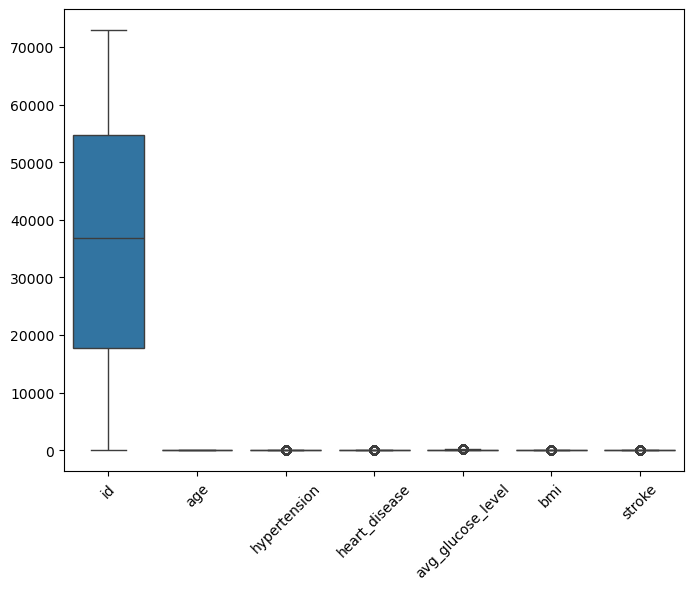

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=stroke_df)
plt.xticks(rotation = 45)
plt.show()

In [12]:
def outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    
    out = df[(df[column]>up) | (df[column]<lb)]
    return out

In [13]:
selected_columns = stroke_df.select_dtypes(include = ["number"])
for col in selected_columns:
    out = outliers(stroke_df,col)
    if len(out)>0:
        print("Outliers found in",col,"and the count is",len(out))   
    else:
        print("No outliers found in", col)

No outliers found in id
No outliers found in age
Outliers found in hypertension and the count is 498
Outliers found in heart_disease and the count is 276
Outliers found in avg_glucose_level and the count is 627
Outliers found in bmi and the count is 126
Outliers found in stroke and the count is 249


In [14]:
from scipy.stats import mstats
for col in selected_columns:
    if (col == "stroke" or col == "age"):
        continue
    stroke_df[col] = mstats.winsorize(stroke_df[col], limits=[0.05, 0.05])  #capping the 5th and 95th percentile values

In [15]:
selected_columns = stroke_df.select_dtypes(include = ["number"])
for col in selected_columns:
    out = outliers(stroke_df,col)
    if len(out)>0:
        print("Outliers found in",col,"and the count is",len(out))   
    else:
        print("No outliers found in", col)

No outliers found in id
No outliers found in age
Outliers found in hypertension and the count is 498
Outliers found in heart_disease and the count is 276
Outliers found in avg_glucose_level and the count is 627
No outliers found in bmi
Outliers found in stroke and the count is 249


In [16]:
stroke_df = stroke_df[stroke_df["age"] >= 18]


In [17]:
stroke_df.skew(numeric_only=True)

id                  -0.027278
age                  0.016852
hypertension         2.386558
heart_disease        3.542182
avg_glucose_level    1.346450
bmi                  0.452175
stroke               3.780793
dtype: float64

In [18]:
stroke_df.shape

(4254, 12)

In [19]:
stroke_df.drop(columns="id", inplace=True)

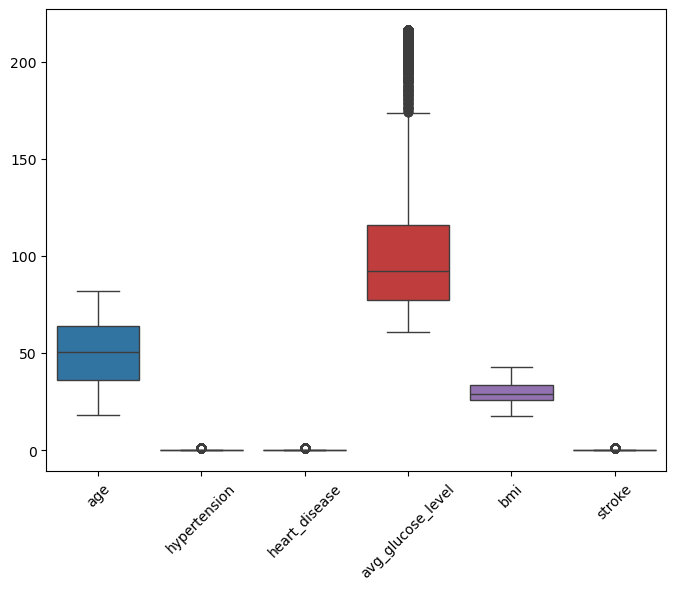

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=stroke_df)
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

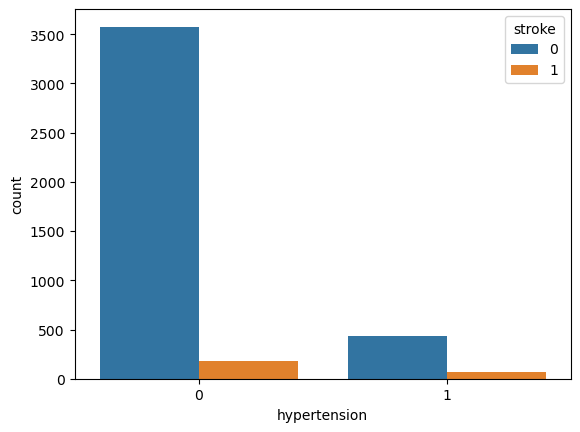

In [21]:
sns.countplot(x=stroke_df["hypertension"], hue=stroke_df["stroke"])

<Axes: xlabel='heart_disease', ylabel='count'>

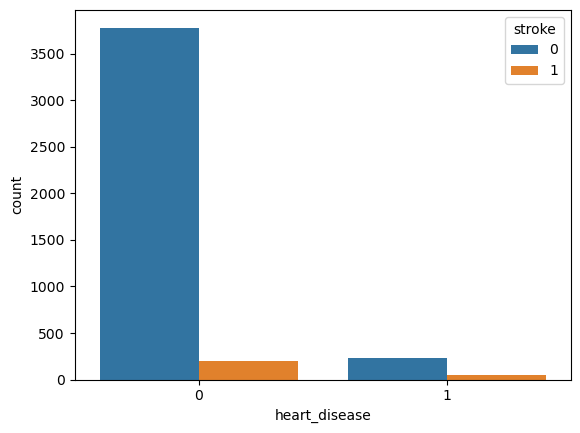

In [22]:
sns.countplot(x=stroke_df["heart_disease"], hue=stroke_df["stroke"])

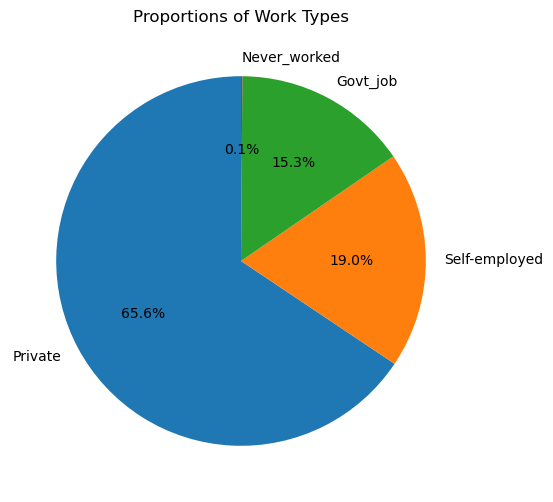

In [23]:
work_counts = stroke_df['work_type'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportions of Work Types')
plt.show()

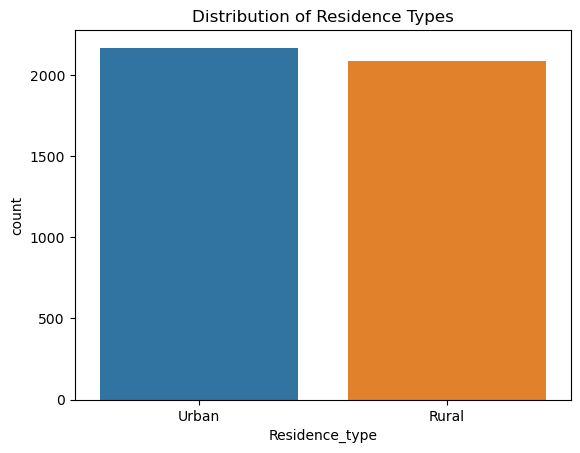

In [24]:
sns.countplot(x='Residence_type', data=stroke_df, hue='Residence_type')
plt.title('Distribution of Residence Types')
plt.show()

<Axes: title={'center': 'Correlation Map'}>

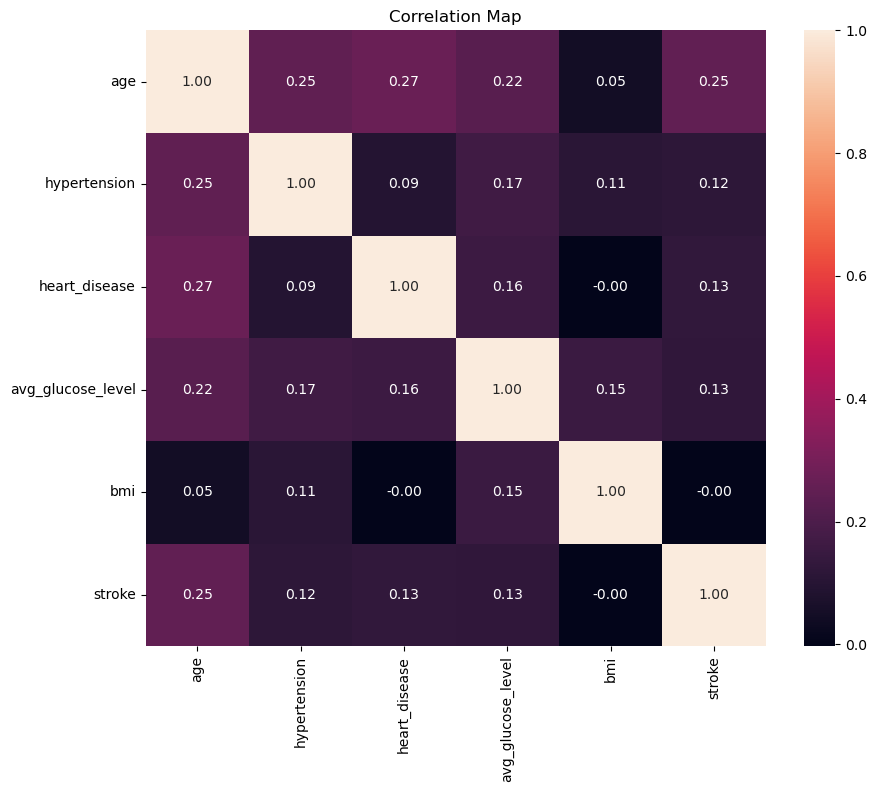

In [25]:
num_cols = stroke_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(num_cols.corr(),annot=True, fmt='.2f')

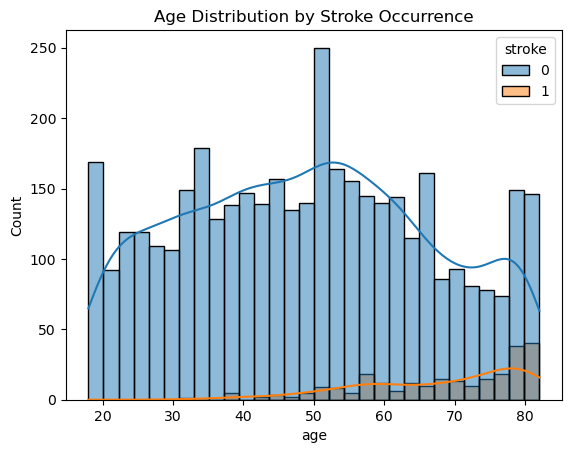

In [26]:
sns.histplot(data=stroke_df, x='age', hue='stroke', kde=True, bins=30)
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

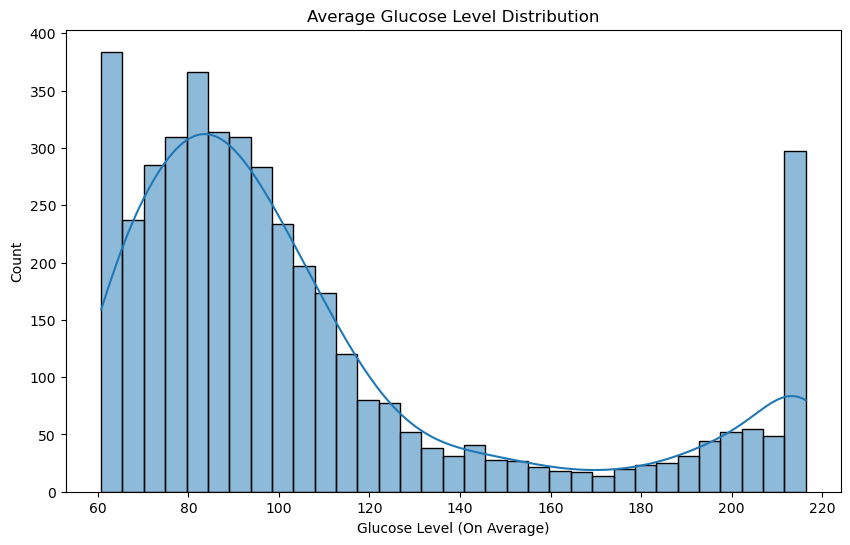

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_df, x="avg_glucose_level", kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level (On Average)')
plt.show()

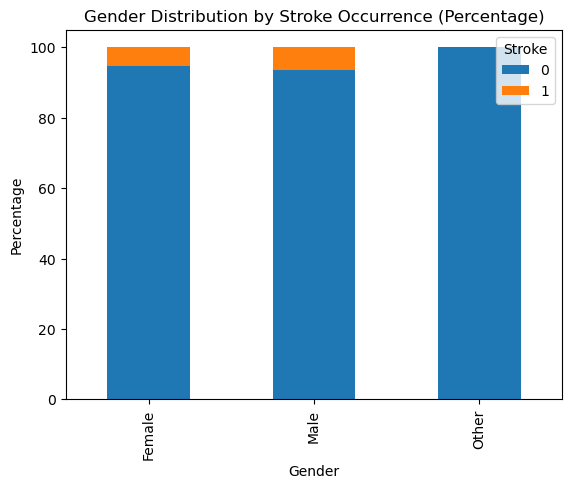

In [28]:
f_filtered = stroke_df[stroke_df['gender'].isin(['Male', 'Female'])]

gender_stroke_counts = stroke_df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_percent = gender_stroke_counts.div(gender_stroke_counts.sum(axis=1), axis=0) * 100

gender_stroke_percent.plot(kind='bar', stacked=True)

plt.title('Gender Distribution by Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Stroke', loc='upper right')
plt.show()

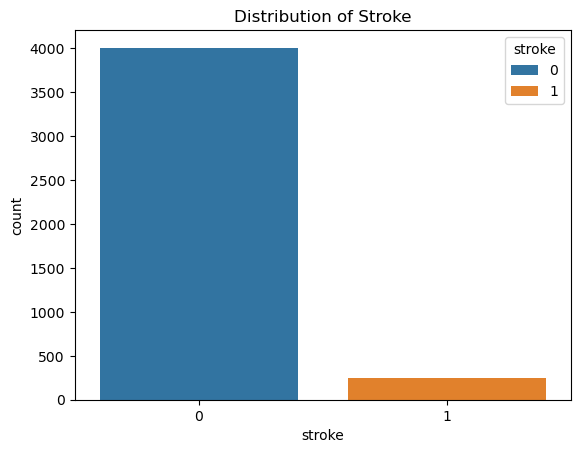

stroke
0    4007
1     247
Name: count, dtype: int64

In [29]:
sns.countplot(x='stroke', data=stroke_df, hue='stroke')
plt.title('Distribution of Stroke')
plt.show()
stroke_df["stroke"].value_counts()

## Preprocessing the data

In [30]:
stroke_df = pd.get_dummies(stroke_df, columns = ["gender","ever_married","work_type","Residence_type","smoking_status"], drop_first=True, dtype='int')

In [31]:
stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,216.38,36.6,1,1,0,1,0,1,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
X = stroke_df.drop(columns="stroke")
y = stroke_df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
len(X_train), len(X_test)

(3403, 851)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

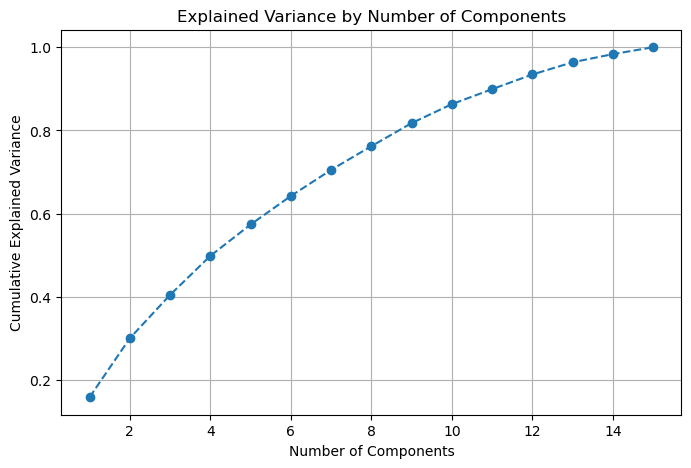

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()

pca.fit(X_resampled)
        
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [37]:
pca = PCA(n_components=9)

X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test_scaled)

In [38]:
X_train = X_train_pca
y_train = y_resampled
X_test = X_test_pca
y_test = y_test

## Model Building

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       789
           1       0.19      0.81      0.30        62

    accuracy                           0.73       851
   macro avg       0.58      0.77      0.57       851
weighted avg       0.92      0.73      0.79       851

ROC-AUC Score: 0.8364610163947831


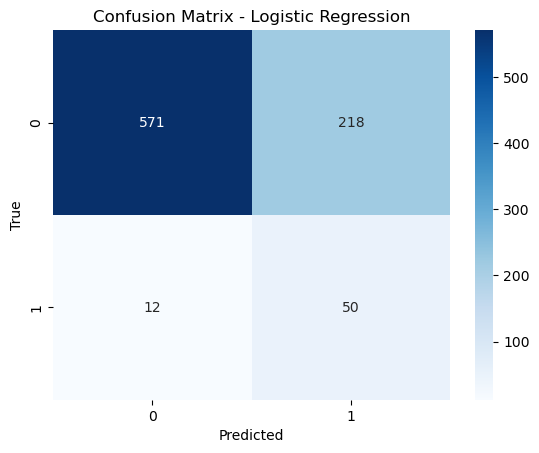

In [39]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_lr))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           Feature        VIF
0                              age  12.416646
1                     hypertension   1.211512
2                    heart_disease   1.172713
3                avg_glucose_level   7.149930
4                              bmi  14.487850
5                      gender_Male   1.682138
6                     gender_Other   1.003034
7                 ever_married_Yes   6.038627
8           work_type_Never_worked   1.008888
9                work_type_Private   4.536291
10         work_type_Self-employed   2.188267
11            Residence_type_Urban   2.003144
12  smoking_status_formerly smoked   2.003823
13     smoking_status_never smoked   2.842275
14           smoking_status_smokes   1.828492


In [41]:
# Ridge (L2 Regularization)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regularization Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

Ridge Regularization Logistic Regression
Accuracy: 0.7297297297297297
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       789
           1       0.19      0.81      0.30        62

    accuracy                           0.73       851
   macro avg       0.58      0.77      0.57       851
weighted avg       0.92      0.73      0.79       851



In [42]:
# Lasso (L1 Regularization)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regularization Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))


Lasso Regularization Logistic Regression
Accuracy: 0.7285546415981199
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       789
           1       0.19      0.81      0.30        62

    accuracy                           0.73       851
   macro avg       0.58      0.76      0.57       851
weighted avg       0.92      0.73      0.79       851



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Define the KNN classifier with distance-weighted voting
knn = KNeighborsClassifier(weights='distance')

# Define the hyperparameter grid to search for optimal 'n_neighbors'
param_grid = {
    'n_neighbors': range(1, 21)  # Testing values from 1 to 20
}

# Set up GridSearchCV to optimize for recall of the positive class (class 1) on validation set
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=4, n_jobs=-1, scoring='f1_weighted', verbose=2)

# Train the model on the training data only
grid_search.fit(X_train, y_train)

# Get the best hyperparameters based on recall score for the positive class
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
print(f'Best K from GridSearchCV (based on recall of positive class): {best_k}')

# Create a new KNN model with the best K
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# Train the KNN model on the training data only (do not combine with validation data)
knn.fit(X_train, y_train)
# Make predictions on the test data
y_test_pred = knn.predict(X_test)

# Evaluate recall on test set (for positive class)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
print(f'Recall for Positive Class (Test): {test_recall:.2f}')
print("\nClassification Report - KNN Classifier:\n", classification_report(y_test, y_test_pred))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best K from GridSearchCV (based on recall of positive class): 1
Recall for Positive Class (Test): 0.11

Classification Report - KNN Classifier:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       789
           1       0.09      0.11      0.10        62

    accuracy                           0.85       851
   macro avg       0.51      0.51      0.51       851
weighted avg       0.87      0.85      0.86       851



In [44]:
# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': range(1, 11),  # Range for max_depth
    'max_features': range(1, 11)  # Int range for max_features
}

# Set up GridSearchCV to optimize for weighted F1 score
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='f1_weighted', cv=4, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best weighted F1 score
best_params = grid_search.best_params_
best_f1_weighted_score = grid_search.best_score_

# Output the best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best weighted F1 score: {best_f1_weighted_score}")

# Create a new Decision Tree model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the best model on the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = best_dt_model.predict(X_test)

# Evaluate on test set
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f'Test Weighted F1 Score: {test_f1:.2f}')
print("\nClassification Report - DecisionTreeClassifier :\n", classification_report(y_test, y_test_pred))

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best parameters: {'max_depth': 10, 'max_features': 7}
Best weighted F1 score: 0.8446755274024866
Test Weighted F1 Score: 0.82

Classification Report - DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       789
           1       0.14      0.42      0.21        62

    accuracy                           0.78       851
   macro avg       0.54      0.61      0.54       851
weighted avg       0.89      0.78      0.82       851



Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}
Best validation F1 score: 78.05%
Validation Accuracy: 70.62%

Classification Report - RandomForrestClassifier
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       789
           1       0.15      0.63      0.24        62

    accuracy                           0.71       851
   macro avg       0.55      0.67      0.53       851
weighted avg       0.90      0.71      0.78       851


ROC-AUC Score: 0.6930679913324338


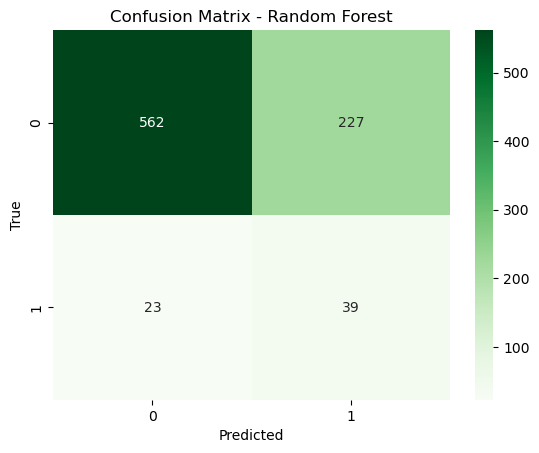

In [45]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500],  # Number of trees in the forest
    'max_depth': [1,2,5],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 6, 10], # Minimum number of samples required to split an internal node
    'class_weight': [None, "balanced"]
}

# Train the model on the training data
model.fit(X_train, y_train)

# Set up GridSearchCV to optimize on the validation set
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='f1_weighted',  # Optimize for weighted F1 score
cv=4, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the validation data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on the test data using the best estimator
y_test_pred = grid_search.best_estimator_.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

# Output results
print(f'Best parameters: {best_params}')
print(f'Best validation F1 score: {best_score * 100:.2f}%')

print(f'Validation Accuracy: {test_accuracy * 100:.2f}%')
print("\nClassification Report - RandomForrestClassifier\n", classification_report(y_test, y_test_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc}")

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()